In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filepath = 'logins.json'
logins = pd.read_json(filepath)

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
login15 = logins.resample('15T', on='login_time').count()

In [6]:
login15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   login_time  9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [7]:
login15.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [8]:
login15

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [9]:
import seaborn as sns

In [10]:
login15.groupby(login15.index.time).mean()

,login_time
00:00:00,14.107843
00:15:00,15.166667
00:30:00,14.950980
00:45:00,14.529412
01:00:00,15.186275
...,...
22:45:00,16.049020
23:00:00,15.421569
23:15:00,15.215686
23:30:00,14.274510


In [11]:
mean_by_time = login15.groupby(login15.index.time).mean()

In [12]:
def to_military(dtime):
    return int(dtime.hour*100 + dtime.minute)

mean_by_time['military'] = mean_by_time.index.map(to_military)

In [13]:
mean_by_time.head()

,login_time,military
00:00:00,14.107843,0
00:15:00,15.166667,15
00:30:00,14.950980,30
00:45:00,14.529412,45
01:00:00,15.186275,100


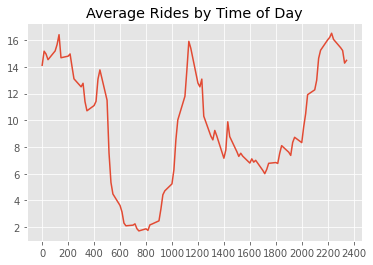

In [14]:
plt.style.use('ggplot')

plt.plot(mean_by_time.military,mean_by_time.login_time)
plt.locator_params(axis="x", nbins=14)
plt.title('Average Rides by Time of Day')
plt.show()

There are clear crests at about 12PM and 2AM as well as about 10PM. This probably differs by weekend/weekday. I'll explore further later.

In [15]:
total_by_day = login15.groupby(login15.index.date).sum()

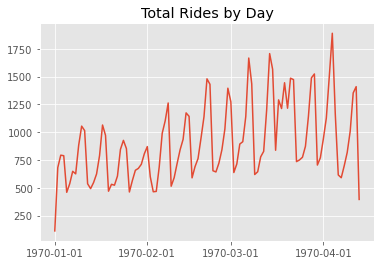

In [16]:
fig, axs = plt.subplots(figsize=(6,4))

axs.plot(total_by_day.index,total_by_day.login_time)
axs.set_xticks(axs.get_xticks()[::2])
plt.title('Total Rides by Day')
plt.show()

There appears to be upward trend and major weekly cyclicality. I'll group by week to see the trend.

In [17]:
total_by_day

,login_time
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459
...,...
1970-04-09,818
1970-04-10,1009
1970-04-11,1352
1970-04-12,1409


In [20]:
by_week = total_by_day.groupby(pd.Grouper(key='date', freq='W-MON'))['login_time'].sum().reset_index().sort_values('date')

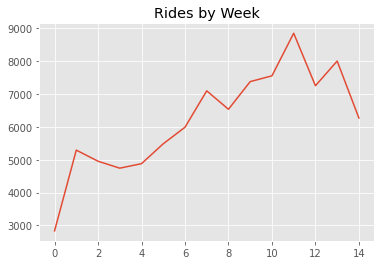

In [21]:
plt.plot(by_week.index, by_week.login_time)
plt.title('Rides by Week')
plt.show()

Definite upward trend. The drop at the end is due to the fact that the data ends with a Monday, so the last entry only represents one day.

In [22]:
total_by_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 1970-01-01 to 1970-04-13
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  103 non-null    int64         
 1   date        103 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4+ KB


In [23]:
total_by_day['date'] = total_by_day.index.map(pd.to_datetime)

In [24]:
total_by_day['weekday']= total_by_day.date.dt.dayofweek

In [25]:
total_by_day

,login_time,date,weekday
1970-01-01,112,1970-01-01,3
1970-01-02,681,1970-01-02,4
1970-01-03,793,1970-01-03,5
1970-01-04,788,1970-01-04,6
1970-01-05,459,1970-01-05,0
...,...,...,...
1970-04-09,818,1970-04-09,3
1970-04-10,1009,1970-04-10,4
1970-04-11,1352,1970-04-11,5
1970-04-12,1409,1970-04-12,6


In [26]:
total_by_weekday = total_by_day.groupby('weekday')['login_time'].sum()

In [27]:
avg_by_weekday = total_by_day.groupby('weekday')['login_time'].mean()

In [28]:
total_by_weekday

weekday
0     8823
1     9268
2    10339
3    11960
4    15208
5    19377
6    18167
Name: login_time, dtype: int64

In [29]:
avg_by_weekday

weekday
0     588.200000
1     662.000000
2     738.500000
3     797.333333
4    1013.866667
5    1291.800000
6    1211.133333
Name: login_time, dtype: float64

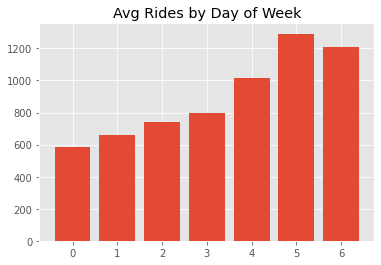

In [30]:
plt.bar(avg_by_weekday.index, avg_by_weekday)
plt.title('Avg Rides by Day of Week')
plt.show()

Weekends see more rides, weekdays steadily increase from Monday to Friday.

In [31]:
login15['weekday'] = login15.index.dayofweek

In [32]:
login15

,login_time,weekday
login_time,,
1970-01-01 20:00:00,2,3
1970-01-01 20:15:00,6,3
1970-01-01 20:30:00,9,3
1970-01-01 20:45:00,7,3
1970-01-01 21:00:00,1,3
...,...,...
1970-04-13 17:45:00,5,0
1970-04-13 18:00:00,5,0
1970-04-13 18:15:00,2,0


In [33]:
def weekend(weekday):
    if weekday == 5 or weekday ==6:
        return 1
    else:
        return 0
login15['weekend'] = login15.weekday.map(weekend)

In [34]:
login15

,login_time,weekday,weekend
login_time,,,
1970-01-01 20:00:00,2,3,0
1970-01-01 20:15:00,6,3,0
1970-01-01 20:30:00,9,3,0
1970-01-01 20:45:00,7,3,0
1970-01-01 21:00:00,1,3,0
...,...,...,...
1970-04-13 17:45:00,5,0,0
1970-04-13 18:00:00,5,0,0
1970-04-13 18:15:00,2,0,0


In [35]:
mean_by_time_weekday = pd.DataFrame(login15[login15['weekend']==0]['login_time'].groupby(
    login15[login15['weekend']==0].index.time).mean())

In [36]:
mean_by_time_weekend = pd.DataFrame(login15[login15['weekend']==1]['login_time'].groupby(
    login15[login15['weekend']==1].index.time).mean())

In [37]:
mean_by_time_weekday

,login_time
00:00:00,12.250000
00:15:00,13.111111
00:30:00,12.708333
00:45:00,12.152778
01:00:00,12.680556
...,...
22:45:00,16.361111
23:00:00,16.375000
23:15:00,16.097222
23:30:00,14.986111


In [38]:
mean_by_time_weekday['military'] = mean_by_time_weekday.index.map(to_military)
mean_by_time_weekend['military'] = mean_by_time_weekend.index.map(to_military)

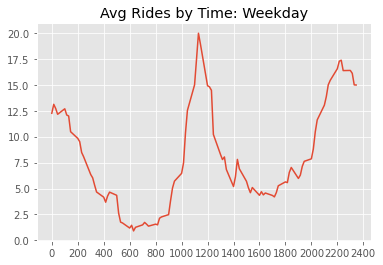

In [39]:
plt.plot(mean_by_time_weekday.military,mean_by_time_weekday.login_time)
plt.locator_params(axis="x", nbins=14)
plt.title('Avg Rides by Time: Weekday')
plt.show()

Definitely a difference from the total averges by time. Smaller late night crest, big jump around 11PM and and 10PM.

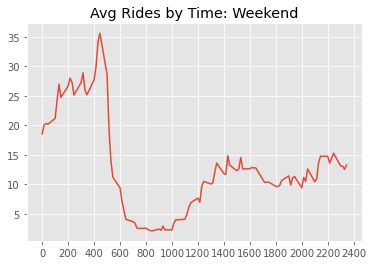

In [40]:
plt.plot(mean_by_time_weekend.military,mean_by_time_weekend.login_time)
plt.locator_params(axis="x", nbins=14)
plt.title('Avg Rides by Time: Weekend')
plt.show()

As expected, weekends top out when people are leaving the bars.